In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv(r"house_price_regression_dataset.csv")

In [19]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [21]:
df.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


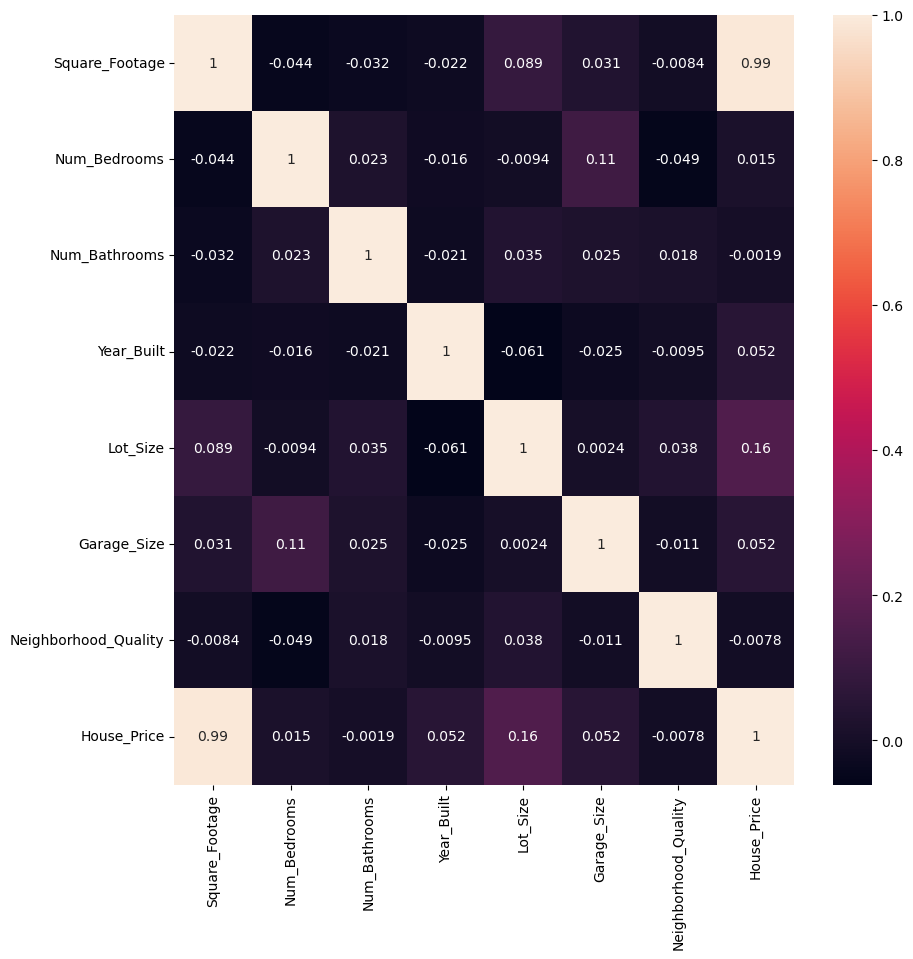

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [26]:
x = df.iloc[ : , :-1]
y = df["House_Price"]

In [28]:
sc = StandardScaler()

In [30]:
sc.fit(x)

StandardScaler()

In [34]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [38]:
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,1.173060
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,0.826514
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,0.826514
...,...,...,...,...,...,...,...
995,0.355074,0.707853,-1.186699,-0.414594,-0.472519,1.200641,1.519607
996,0.289730,-1.394681,0.032930,0.603707,0.153428,-0.027008,1.519607
997,-0.166885,0.707853,0.032930,-1.190442,0.984371,-1.254658,-1.252766
998,1.520119,1.408698,0.032930,-1.772328,-0.653046,-1.254658,0.479967


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# LinearRegression

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
lr.score(x_test,y_test)*100

99.84263636823412

In [67]:
lr.coef_

array([250366.57881176,  14589.8296276 ,   6730.2708233 ,  20489.31651404,
        19310.12495234,   4191.87191768,    332.04368583])

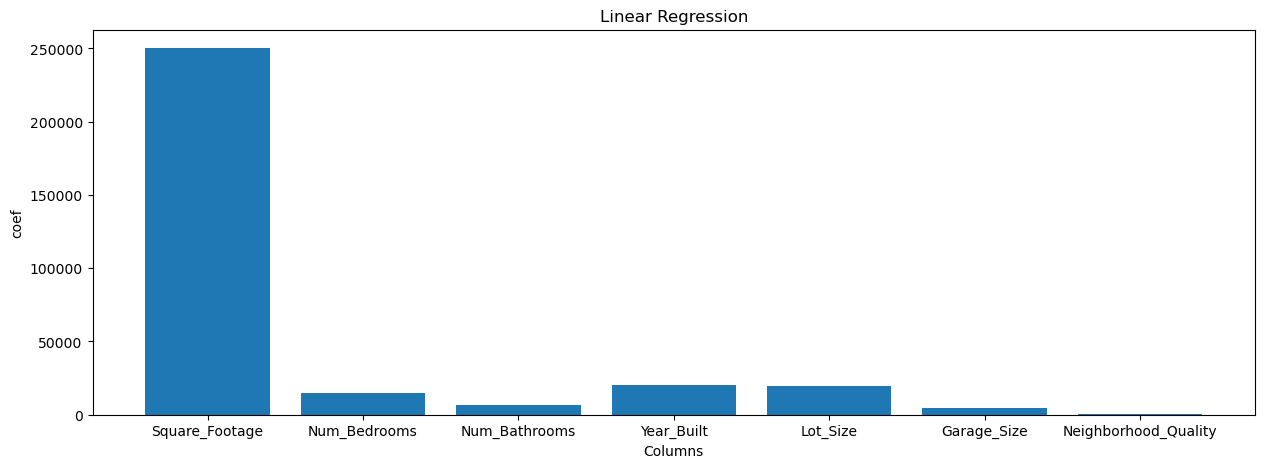

In [69]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

In [74]:
x.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality'],
      dtype='object')

# Lasso (L1)

In [77]:
la = Lasso(alpha=0.5)

In [79]:
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [81]:
la.score(x_test,y_test)*100

99.84263489955391

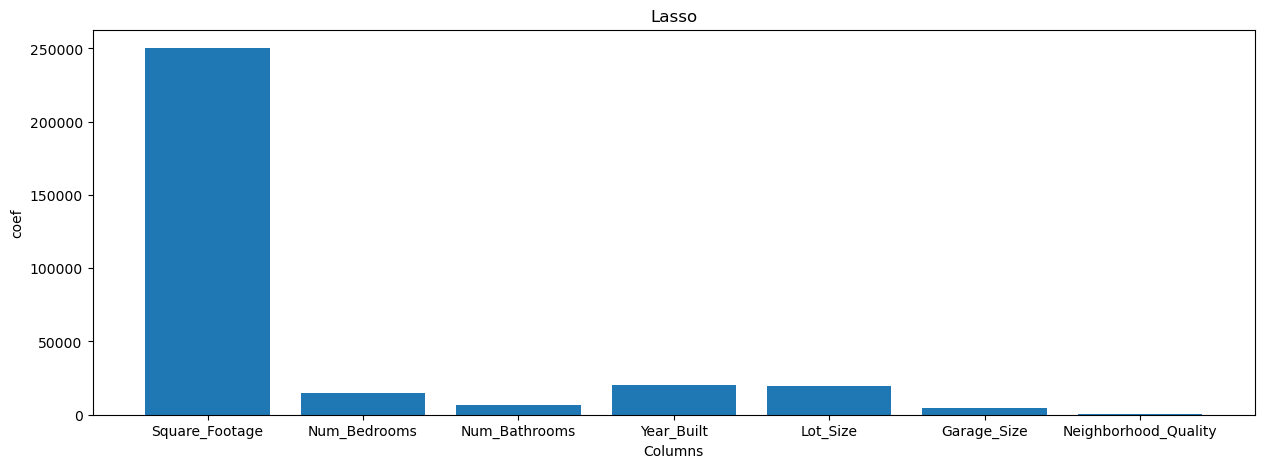

In [98]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

# Ridge (L2)

In [101]:
ri = Ridge(alpha=0.5)

In [103]:
ri.fit(x_train,y_train)

Ridge(alpha=0.5)

In [105]:
ri.score(x_test,y_test)*100

99.8418606866934

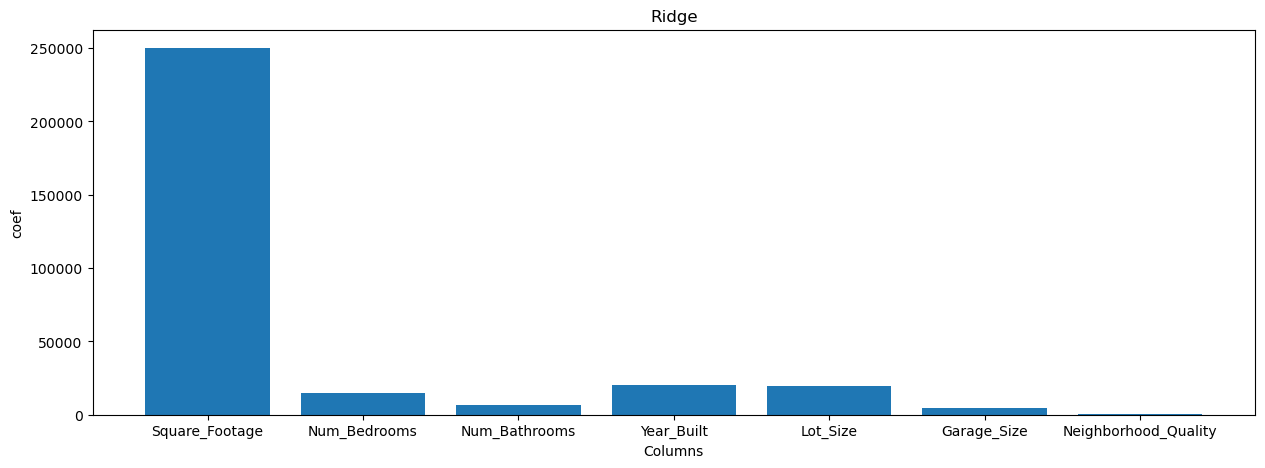

In [107]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

# Error

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np # for rmse as it doesnt directly calculate as mse

In [118]:
mean_squared_error(y_test,lr.predict(x_test))

101434798.50563568

In [120]:
mean_absolute_error(y_test,lr.predict(x_test))

8174.583600006608

In [122]:
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

10071.484424137074


In [124]:
# Find same 3 type error for lasso and ridge

In [132]:
# Compare and anlyse using follwing table to cheak which to use lasso or ridge

In [134]:
df1 = pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_,"Lasso":la.coef_, "Ridege":ri.coef_})

In [136]:
df1 # Mostly same

,col_name,LinearRegression,Lasso,Ridege
0,Square_Footage,250366.578812,250366.047189,250206.964594
1,Num_Bedrooms,14589.829628,14589.298498,14574.958045
2,Num_Bathrooms,6730.270823,6729.813728,6719.845632
3,Year_Built,20489.316514,20488.765219,20473.036117
4,Lot_Size,19310.124952,19309.683751,19317.226574
5,Garage_Size,4191.871918,4191.455331,4198.354505
6,Neighborhood_Quality,332.043686,331.568599,329.871589
